In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

import arviz as az

In [2]:
az.style.use('arviz-white')

# Convergence diagnostics for a well behaved model

### Chapter 3.4: Diagnosing and improving convergence

In this example the chains do converge and we show how the convergence diagnostics flag convergence. The model is:

$$\mu_1,\mu_2\sim\mbox{Normal}(0,1000)$$
$$Y_i\sim\mbox{Poisson}(\exp[\mu_i])$$


There are two observations: $Y_1=1$ and $Y_2=10$.

In [3]:
with pm.Model() as model:
    # Priors
    μ = pm.Normal('μ', 0, 1000, shape=2)
    #likelihood
    y = pm.Poisson('y', np.exp(μ), observed=[1, 10])
    samples = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [μ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:00<00:00, 3086.21draws/s]


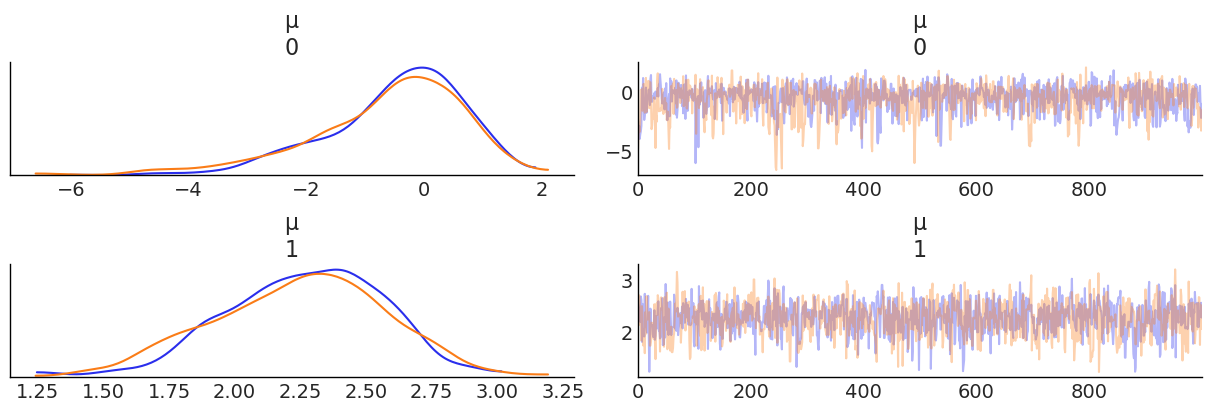

In [4]:
az.plot_trace(samples);

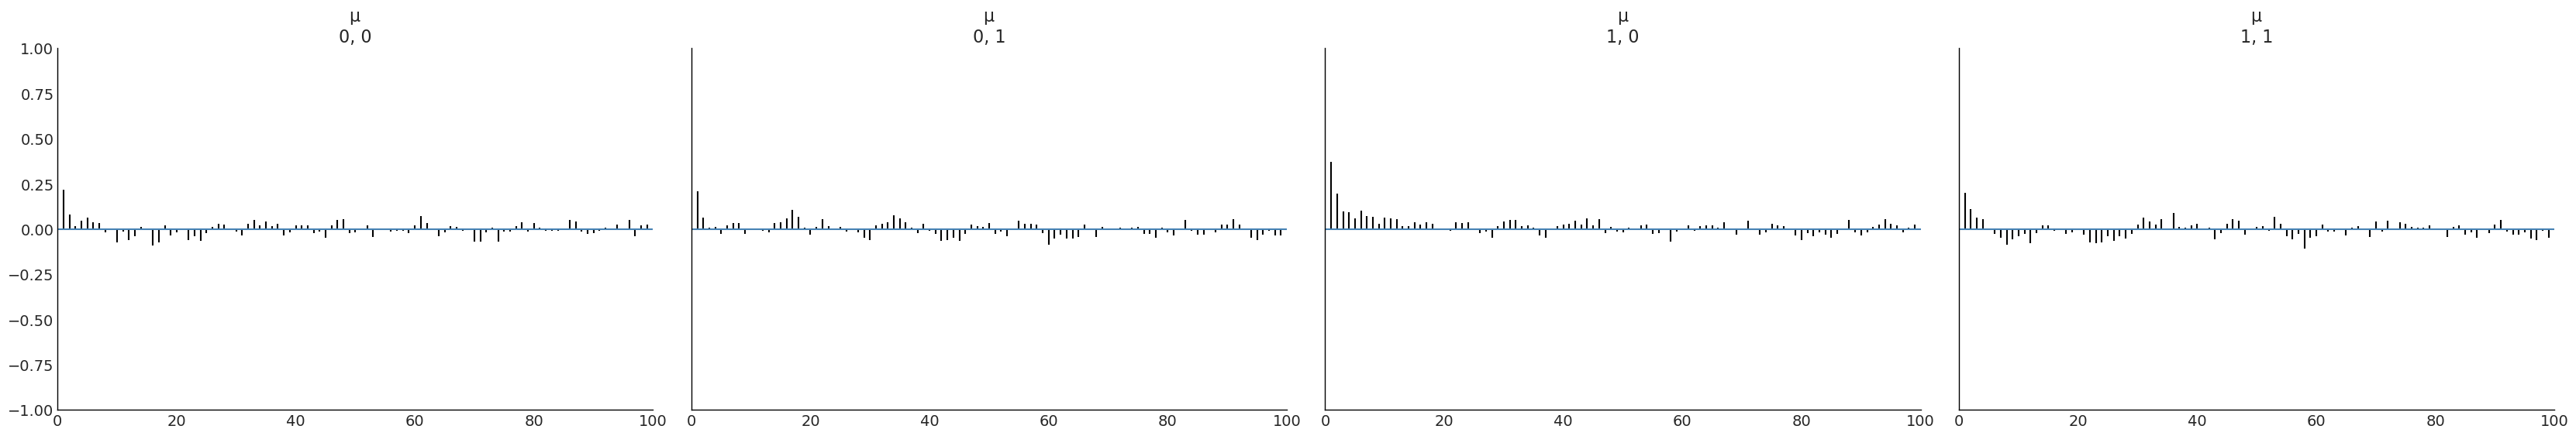

In [5]:
az.plot_autocorr(samples);

In [6]:
az.ess(samples).to_dataframe()

,μ
μ_dim_0,
0,914.885235
1,1206.921610


In [7]:
# R greater than 1.01 indicates poor convergence
az.rhat(samples).to_dataframe()

,μ
μ_dim_0,
0,1.009688
1,1.001478
